<center><font size = 8><b>Digital Image Processing</b></font></center><br\><br\>
<center><font size = 6><b>Assignment 2: Morphological Image Processing</b></font></center>

### Name:
### ID:
### Email:

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = [15.,10.]

%matplotlib inline

### Question 11
Propose a pipeline to replace the morning background of the left image with the
night background of the right image.
<img src="Q11.PNG" alt="drawing" width="700"/>

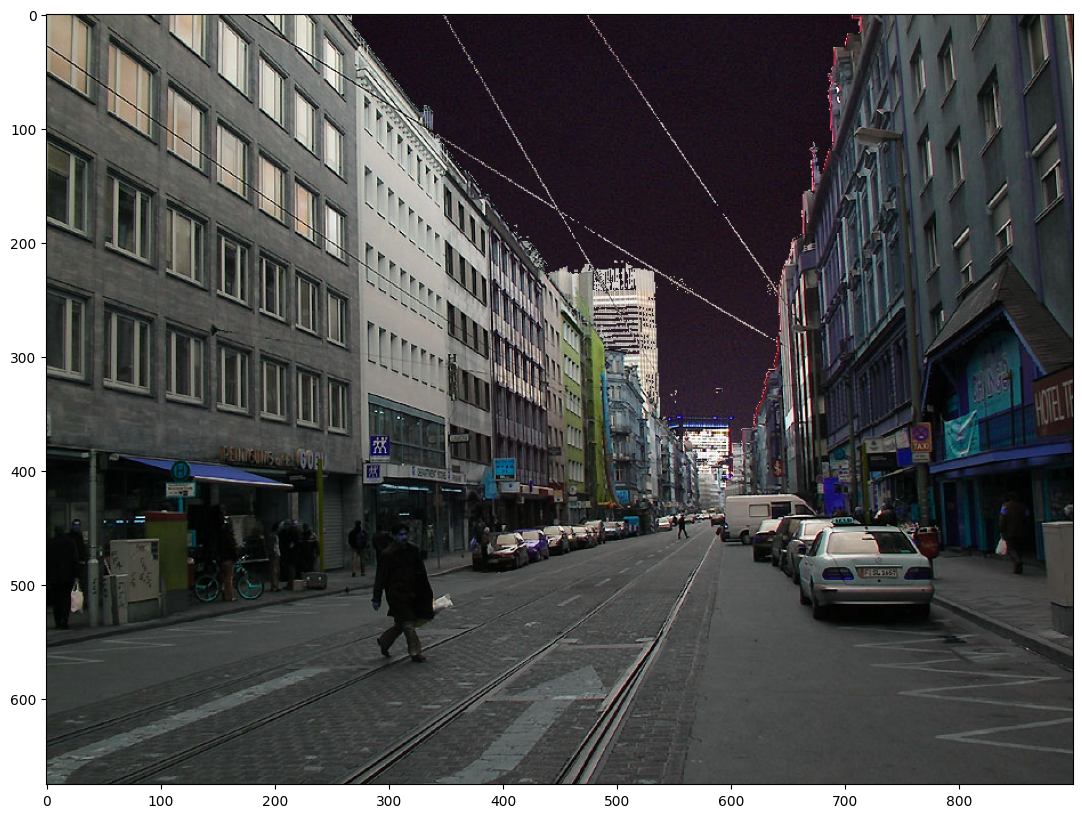

In [ ]:

morning = cv2.imread("morning.jpg", cv2.IMREAD_GRAYSCALE)
morning_color = cv2.imread("morning.jpg", cv2.IMREAD_ANYCOLOR)
evening = cv2.imread("evening.jpg", cv2.IMREAD_ANYCOLOR)
resized_evening = cv2.resize(evening, (morning.shape[1], morning.shape[0]), interpolation=cv2.INTER_NEAREST)

SE1 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5, 5))

Xz = np.zeros(shape=morning.shape, dtype= np.uint8)
Xz[10,600] = 1
Xz_1 = np.zeros(shape=morning.shape, dtype=np.uint8)
threshold, morning_image = cv2.threshold(src=morning, thresh=215, maxval=1, type=cv2.THRESH_BINARY)


while not np.array_equal(Xz, Xz_1):
    Xz_1 = Xz
    Xz = np.logical_and(cv2.dilate(src=Xz_1 ,kernel=SE1, iterations=1), morning_image).astype(np.uint8)
resized_mask = cv2.resize(Xz, (evening.shape[1], evening.shape[0]), interpolation=cv2.INTER_NEAREST)
masked_image = np.zeros_like(morning_color)

masked_image[Xz == 1] = resized_evening[Xz == 1]
morning_color[Xz == 1] = 0
result=np.bitwise_or(morning_color,masked_image)
plt.imshow(result)


### Question 12
Design an image processing pipeline for highlighting the
coins available in the following image as shown:
<img src="Q12.PNG" alt="drawing" width="700"/>
<b>Note: </b>Represent both boundaries as circles.

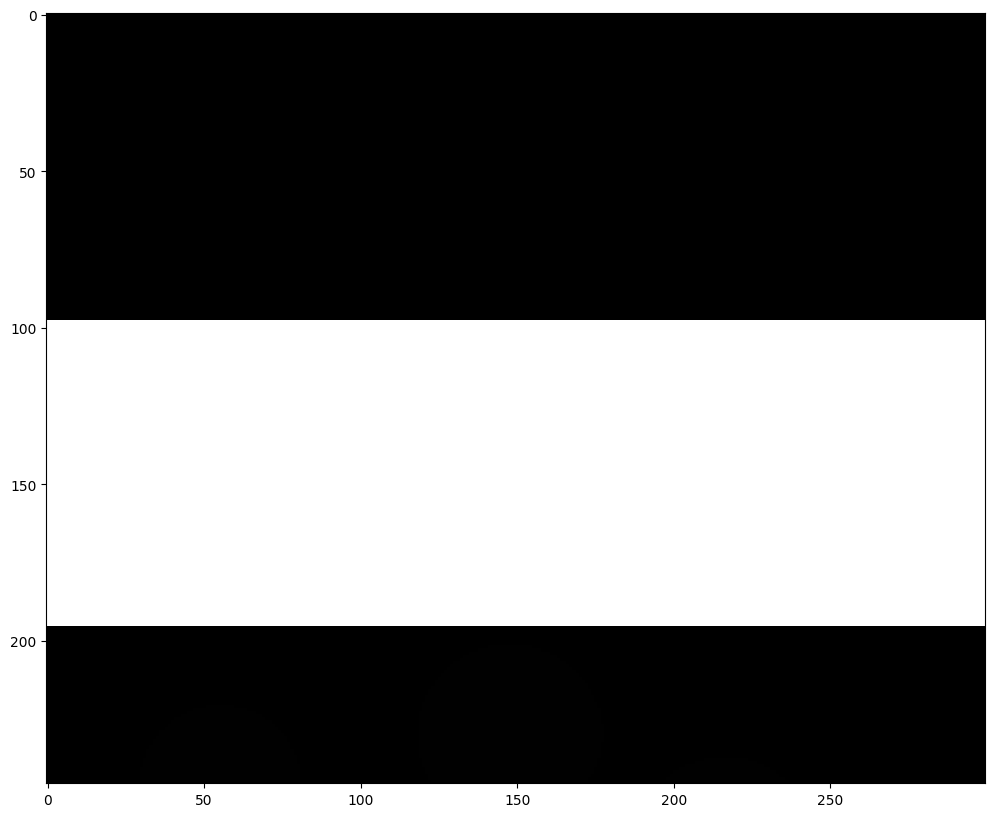

In [85]:
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
threshold, coins = cv2.threshold(src=coins, thresh=80, maxval=1, type=cv2.THRESH_BINARY)

SE = np.zeros(shape=coins.shape, dtype= np.uint8)
SE[25,150] = 1
Xz_1 = np.zeros(shape=coins.shape, dtype=np.uint8)
while not np.array_equal(Xz, Xz_1):
    Xz_1 = Xz
    SE = np.logical_and(cv2.dilate(src=Xz_1 ,kernel=SE1, iterations=1), morning_image).astype(np.uint8)
    
#SE = np.ones(shape=(40,40),dtype=np.uint8)
opened_image = cv2.morphologyEx(src=coins, op=cv2.MORPH_OPEN, kernel=SE, iterations=1)
plt.imshow(opened_image,cmap="gray")
# TODO: Display the final image